In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re


In [14]:
# read csv file
df_labels = pd.read_csv('ADSIM/adsim_label.csv')
df_labels.head()

,campaign,ID,Label
0,Mürzzuschlag,2014-09-12_12-38-28,[Negativ]
1,Mürzzuschlag,2014-09-12_13-07-10,[Negativ]
2,Mürzzuschlag,2014-09-12_13-19-10,[Negativ]
3,Mürzzuschlag,2014-09-12_13-33-40,[Negativ]
4,Mürzzuschlag,2014-09-12_13-38-32,[Negativ]


<Axes: xlabel='Label'>

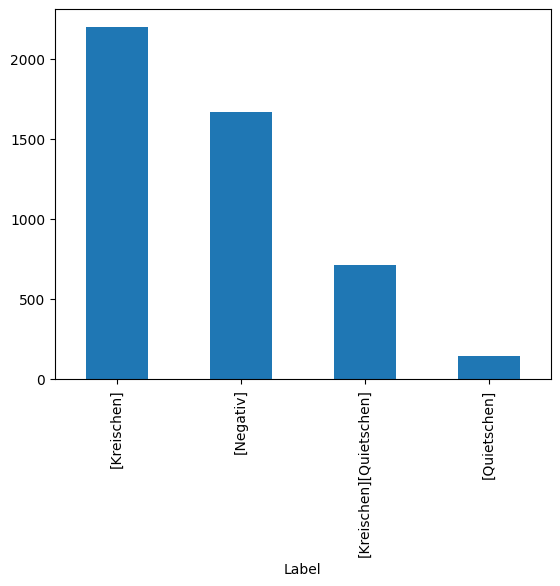

In [15]:
df_labels["Label"].value_counts().plot(kind='bar')

<Axes: xlabel='campaign'>

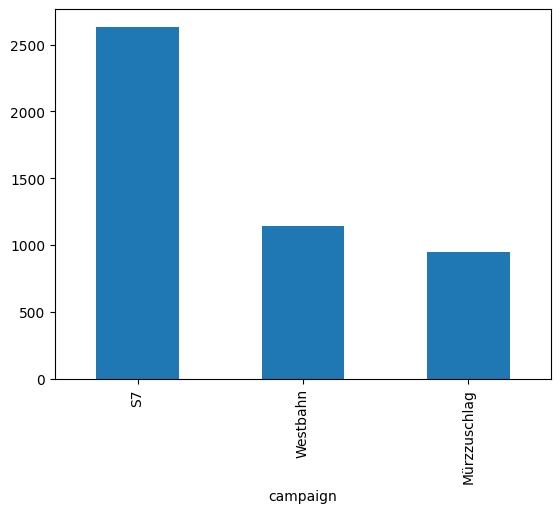

In [16]:
df_labels["campaign"].value_counts().plot(kind='bar')

In [17]:
df_labels["ID_label"] = df_labels["ID"].astype(str) + "_01"


,campaign,ID,Label,ID_label
0,Mürzzuschlag,2014-09-12_12-38-28,[Negativ],2014-09-12_12-38-28_01
1,Mürzzuschlag,2014-09-12_13-07-10,[Negativ],2014-09-12_13-07-10_01
2,Mürzzuschlag,2014-09-12_13-19-10,[Negativ],2014-09-12_13-19-10_01
3,Mürzzuschlag,2014-09-12_13-33-40,[Negativ],2014-09-12_13-33-40_01
4,Mürzzuschlag,2014-09-12_13-38-32,[Negativ],2014-09-12_13-38-32_01


In [19]:
rail_type = os.listdir('ADSIM/Import-2023-04/data/2013-535')

#create a list for all the directories in rail type and fill it with the filenames in this directories
rail_data_labeled = []
for i in range(len(rail_type)):
    rail_data_labeled.append(os.listdir('ADSIM/Import-2023-04/data/2013-535/' + rail_type[i]))

# unlist the list of lists
rail_data_labeled = [item for sublist in rail_data_labeled for item in sublist]
rail_data_labeled

# remove the .WAV from the filenames to make it easier to compare with the ID_label
data_list_test = []
re.sub(".WAV", "", rail_data_labeled[0])

for i in range(len(rail_data_labeled)):
    data_list_test.append(re.sub(".WAV", "", rail_data_labeled[i]))

# create a new column in the dataframe and fill it with the data name
df_labels["data"] = None
for i in range(df_labels["ID_label"].shape[0]):
    if df_labels["ID_label"][i] in data_list_test:
        df_labels["data"][i] = "E:/ADSIM/Import-2023-04/data/2013-535/" + df_labels["campaign"][i] + "/" +  df_labels["ID_label"][i] + ".WAV"
    else:
        print("not found")
del df_labels["ID_label"]

df_labels["data"][0]

'E:/ADSIM/Import-2023-04/data/2013-535/Mürzzuschlag/2014-09-12_12-38-28_01.WAV'

In [23]:
df_labels.head()

,campaign,ID,Label,data
0,Mürzzuschlag,2014-09-12_12-38-28,[Negativ],E:/ADSIM/Import-2023-04/data/2013-535/Mürzzusc...
1,Mürzzuschlag,2014-09-12_13-07-10,[Negativ],E:/ADSIM/Import-2023-04/data/2013-535/Mürzzusc...
2,Mürzzuschlag,2014-09-12_13-19-10,[Negativ],E:/ADSIM/Import-2023-04/data/2013-535/Mürzzusc...
3,Mürzzuschlag,2014-09-12_13-33-40,[Negativ],E:/ADSIM/Import-2023-04/data/2013-535/Mürzzusc...
4,Mürzzuschlag,2014-09-12_13-38-32,[Negativ],E:/ADSIM/Import-2023-04/data/2013-535/Mürzzusc...


In [21]:

os.makedirs("ADSIM/Import-2023-04/data/2013-535/labeled_data_2013-535", exist_ok=True)

import os
import shutil

for i in range(df_labels["data"].shape[0]):
    source_path = df_labels["data"][i]
    if os.path.exists(source_path):
        shutil.copy(source_path, "E:/ADSIM/Import-2023-04/data/2013-535/labeled_data_2013-535")
    else:
        print(f"Source file not found: {source_path}")


In [ ]:
#save df_labels as csv file
df_labels.to_csv("ADSIM/Import-2023-04/data/2013-535/labeled_data_2013-535/labels.csv", index=False)